# KNN Prediction on Diabetes

#### Created by: Polin Tsenova 

Diabetes is a disease in which blood glucose, or blood sugar, levels are too high. It is a life-changing condition that requires careful blood sugar management and a healthy lifestyle for a person to be able to manage it correctly. Consequently early diagnosis plays an important role for keeping the sugar levels under control. This notebook analyses diabetes dataset publically available on Kaggle, models the data using the KNN algoritm and tries to predict if a person has diabetes or not.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load Data

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Initial Data Exploration 

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<!-- ##### Can minimum value of below listed columns be zero (0)? -->
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

On these columns, a value of zero does not make sense and thus indicates missing value.

### Clean Data

In [8]:
columns_with_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
for column in columns_with_zeroes:
    mean_value = diabetes[column].mean(skipna= True)
    diabetes[column] = diabetes[column].replace(0, mean_value)

In [10]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Data Analysis and Visualisation

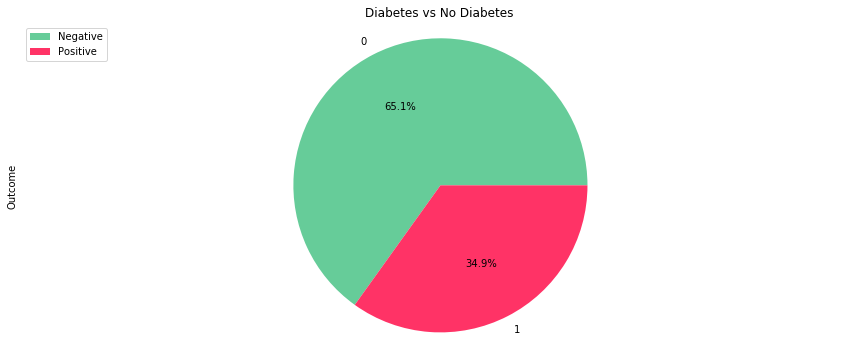

In [11]:
# prepare data column 
outcome=diabetes['Outcome'].value_counts()

colors_list = ['#66CC99', '#FF3366']

# plot the figure
outcome.plot(kind='pie',figsize=(15, 6), autopct='%1.1f%%', colors=colors_list)

# add title
plt.title('Diabetes vs No Diabetes') 

#figure placement
plt.axis('equal') 

# add legend
plt.legend(labels=['Negative','Positive'], loc='upper left') 

plt.show()

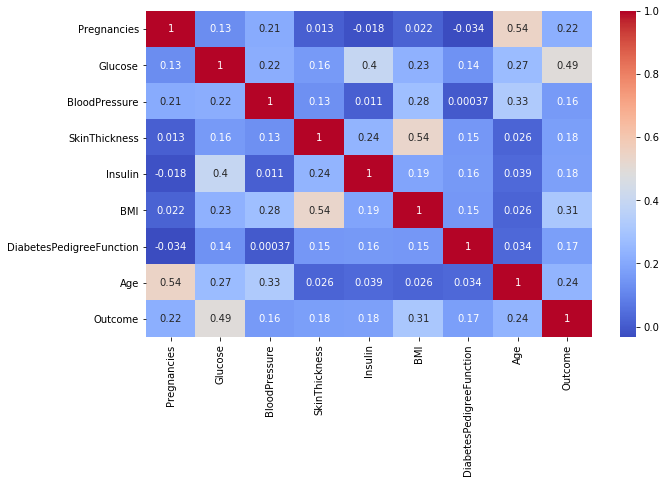

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")
plt.show()

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


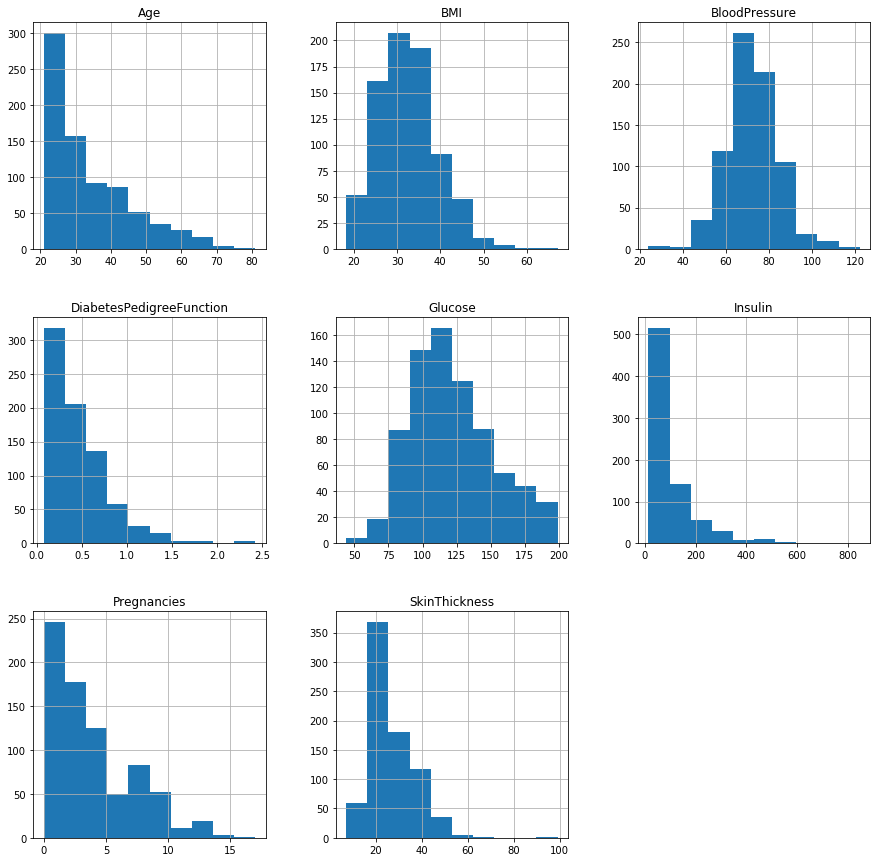

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
diabetes.iloc[:, :-1].hist(ax = ax)
plt.show()

### Modeling

In [14]:
# Select variavles
x = diabetes.iloc[:, :-1].values
y = diabetes['Outcome'].values

In [15]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
# Splitting the Data into Train and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

##### How to choose the best number of K?

One possible solution in the processs of finding the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In [17]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

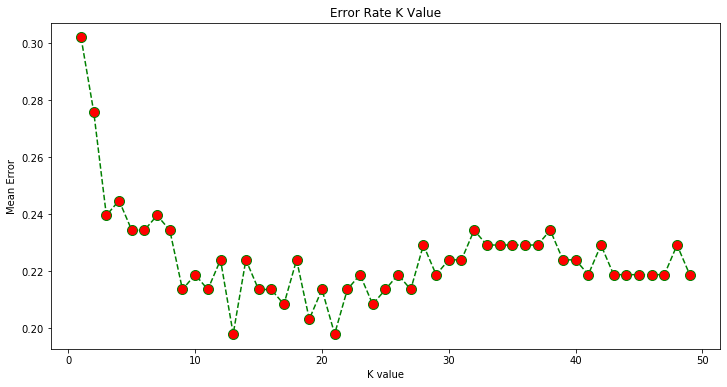

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='green', linestyle='dashed',  marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()

From the graph it can be concluded that when K equals 19 error rate reaches its minimum. Consequently the best value for K is equal to 19.

In [19]:
# Create a model
knn_model = KNeighborsClassifier(n_neighbors=19, metric= 'euclidean')

In [20]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

### Evaluate the model

In [21]:
y_predict = knn_model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

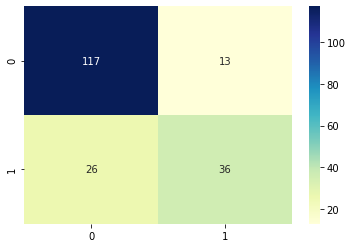

In [22]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [23]:
# Checking the accuracy of the model
print("Accuracy is",accuracy_score(y_test, y_predict)*100)

Accuracy is 79.6875


In [24]:
# Check for model overfiting
knn_model_check = knn_model.score(x_train, y_train)
knn_model_check * 100

77.08333333333334

In [25]:
# Report of results
report = classification_report(y_test, y_predict)
print('REPORT:', report, sep='\n')

REPORT:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



### Analysing the results

KNN model was build for predicting if a patient has a diabetes and not.The dataset contains 768 individual data records with variables such as age, glucose level, blood presure and outcome- positive(1) or negative(0) for the disease. There is not quite a high correlation between any two variables in the dataset. Data was split for training and testing purposes on the 75:25 ratio respectively. The model predicted correctly 153 records out of the 192, which is exactly 80% accuracy. Compared to the traing accuracy of the model, there is 3 percentage difference which is not a quite sensitive and it can be concluded that the model is not overfiting.A more detailed information of prediction records can be seen in the confusion matrix. Here is a summary of the results:

* 117 true negative predictions
* 26 false negative predictions
* 13 false positive prediction
* 36 true positive predictions


From the prediction results it can be calculated other indicators of the accuracy. For more convinience classification report is generated, where f1-score is present. This is an indicator that reflects the worse case scenario as it takes both false positives and false negatives into account. F1-score for this model is 0.80 which moderately good result, it is more closer to the perfect fit of 1.

On average there is 20% chance of predicting an erroneous outcome. Consequently it is advisiable for the modeler to try other statistical models such as Decision Tree, Logistic Regresion, SVM on the data and compare the results. Taking this approach into consideration will ensure that a robust model is constructed and best result is presented.